# The Adult dataset
Description
Title of dataset: adult.csv

Sources:

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 

Number of Instances

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

* 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 

Missing Values:

 7% rows have missing values. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
# Shape of the dataframe
df.shape
print('no. of rows:',df.shape[0])
print('no. of columns:',df.shape[1])

no. of rows: 48842
no. of columns: 15


In [12]:
# Handle missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
# Handling the missing values
miss=['?']
df_new=pd.read_csv('adult.csv', na_values=miss)
df_new.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [19]:
df.loc[df.workclass=='?','native-country']

4        United-States
6        United-States
13       United-States
22       United-States
35       United-States
             ...      
48811    United-States
48812    United-States
48820    United-States
48822    United-States
48823    United-States
Name: native-country, Length: 2799, dtype: object

# observation:-
I observed that mostly the missing values are from the workclass and occupation column. It can also be observed that mostly the rows have native-country as 'united states'.

In [20]:
df_new.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# OBSERVATION:-
I observed that the most of the missing values are from the workclass and occupation columns simultaneously.

In [17]:
df_new.dropna(axis=0,how='any',inplace=True)
# We know that fnlwgt column is not helpful for us so we will remove it from the dataset
df_new.drop('fnlwgt',axis=1,inplace=True)
df_new.shape

(45222, 14)

In [21]:
# percentage of row having missing value
missing_values=(df.shape[0]-df_new.shape[0])/df.shape[0]
print(missing_values)

0.07411653904426518


# OBSERVATION:-
I observed that out of total 7.41% rows have one or more missing values.

Now the size of our data is 45222 rows and 14 columns.

# univariate analysis

In [22]:
df_new.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<function matplotlib.pyplot.show(*args, **kw)>

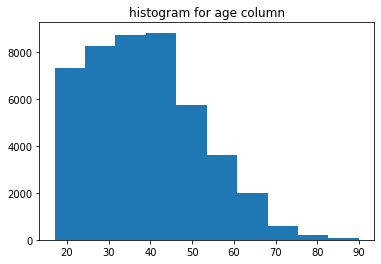

In [23]:
# Performing univariate analysis on the age column
plt.hist(df_new['age'])
plt.title('histogram for age column')
plt.show

# OBSERVATION:-
I observed that most of the people in this dataset belong to the age group of 20-40.

<function matplotlib.pyplot.show(*args, **kw)>

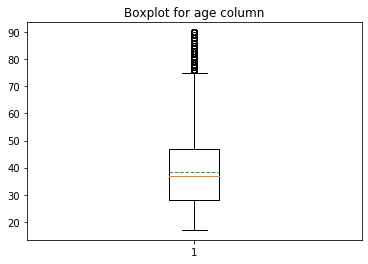

In [24]:
plt.boxplot(df_new['age'],showmeans=True,meanline=True)
plt.title('Boxplot for age column')
plt.show

# OBSERVATION:-
I observed from the above boxplot that median of the age column is 37 and the mean of the age is 39. Also I observe that first and third quantile are 29 and 47 respectively. It also means that most of the data values lies within this range. It can also be damaged that there are also presence of outliers in this column which can be easily determined by viewing to the plot. In this case the outliers are people having age above 75.

Text(0.5, 1.0, 'PDF for age column')

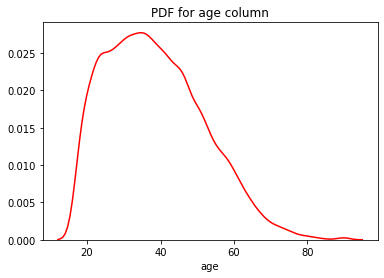

In [25]:
sns.distplot(df_new['age'],color='r',hist=False,kde=True,rug=False)
plt.title('PDF for age column')

# Observation:-
I observed that this plot is not symmetric and is skewed right or positively skewed. In this the mean is shifted toward left side. From this curve this is also clear that the outliers are present on right hand side of the plot.

In [26]:
print(df_new.workclass.value_counts())
df_new.workclass.value_counts(normalize=True)

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


Private             0.736522
Self-emp-not-inc    0.083941
Local-gov           0.068551
State-gov           0.043032
Self-emp-inc        0.036398
Federal-gov         0.031091
Without-pay         0.000464
Name: workclass, dtype: float64

# OBSERVATION:-
I observed that most of the people are employed in the private sector. This code shows the percentage of the all people employed in the different sectors.

<=50K    34014
>50K     11208
Name: income, dtype: int64
In the percentage:
 <=50K    0.752156
>50K     0.247844
Name: income, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

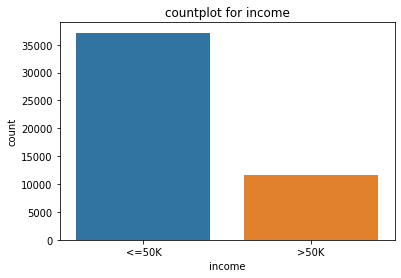

In [27]:
print(df_new['income'].value_counts())
print('In the percentage:\n',df_new['income'].value_counts(normalize=True))
sns.countplot(df['income'])
plt.title('countplot for income')
plt.show

# OBSERVATION:-

I observed that 76.07% of people have there income less than or equal to 50K and rest 23.92% have income greater than 50K.

Male      30527
Female    14695
Name: gender, dtype: int64
In the normalized form:
 Male      0.675048
Female    0.324952
Name: gender, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

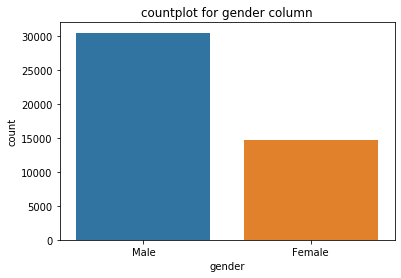

In [28]:
# Analysis on the gender column
print(df_new.gender.value_counts())
print('In the normalized form:\n',df_new.gender.value_counts(1))
sns.countplot(df_new.gender)
plt.title('countplot for gender column')
plt.show

# OBSERVATION:-
I observed that 66.84% are male in gender column and 33.15% are female in gender column.

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64
In the normalized form:
 White                 0.860267
Black                 0.093494
Asian-Pac-Islander    0.028813
Amer-Indian-Eskimo    0.009619
Other                 0.007806
Name: race, dtype: float64


Text(0.5, 1.0, 'countplot for race column')

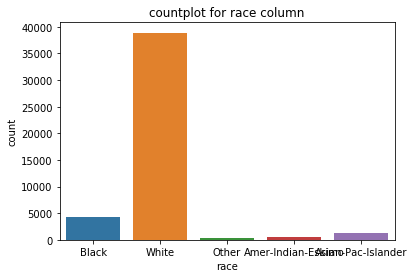

In [29]:
# Analysis for race column
print(df_new.race.value_counts())
print('In the normalized form:\n',df_new.race.value_counts(1))
sns.countplot(df_new.race)
plt.title('countplot for race column')

# OBSERVATION:-
I observe that 85.50% are white in race column , 9% black , 3% Asian-Pac-Islander , 0.9% Amer-Indian-Eskimo , and 0.8 Others.

Text(0.5, 1.0, 'PDF for race column')

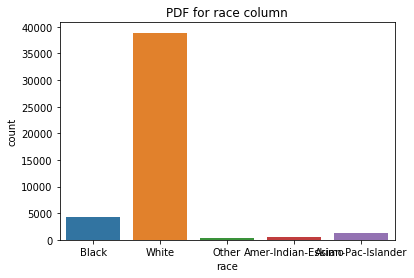

In [30]:
sns.countplot(df_new['race'])
plt.title('PDF for race column')

# BIVARIATE ANALYSIS

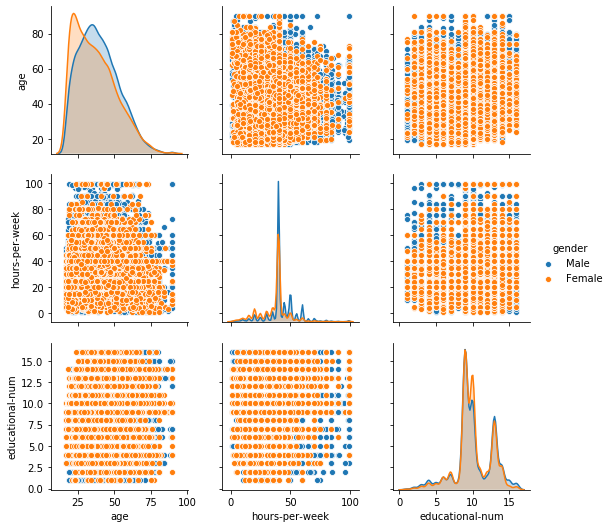

In [31]:
sns.pairplot(df, vars=['age', 'hours-per-week','educational-num'],hue='gender')


# OBSERVATION:-
Bivariate analysis 'age' , 'hours-per-week' , 'educational-num' and 'gender'.

income,<=50K,>50K
gender,,
Female,0.38296,0.148911
Male,0.61704,0.851089


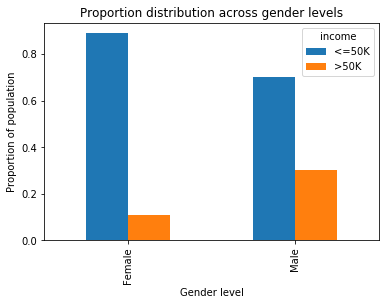

In [33]:
gender = round(pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
abhi = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
abhi.set_xlabel('Gender level')
abhi.set_ylabel('Proportion of population')

pd.crosstab(df_new.gender,df_new.income,normalize='columns')

# OBSERVATION:-

I observed that in the category of income of <=50k 38.29% are female and 61.70% are male. And in category of income >50k there are 14.89% female and 85.10% male.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,16192.0,36.400692,11.948866,1.0,30.0,40.0,40.0,99.0
Male,32650.0,42.416845,12.120042,1.0,40.0,40.0,48.0,99.0


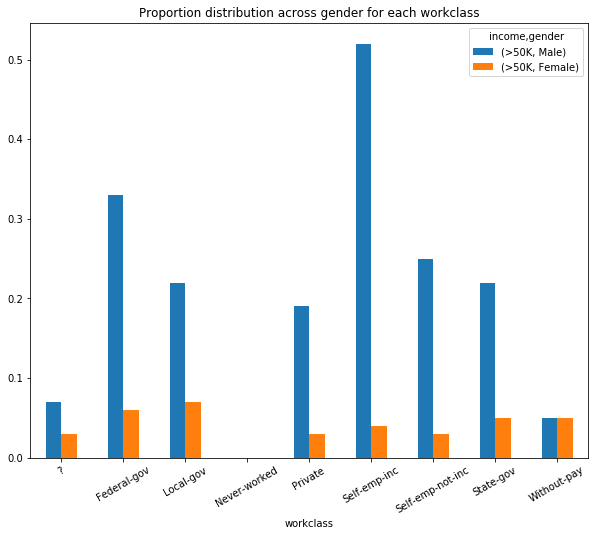

In [37]:
gender_workclass = round(pd.crosstab(df.workclass, [df.income, df.gender]).div(pd.crosstab(df.workclass, [df.income, df.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
abhi.set_xlabel('Gender level')
abhi.set_ylabel('Proportion of population')

wrk=df.groupby('workclass')
rlt=df.groupby('relationship')
inc=df.groupby('income')

gender=df.groupby('gender')
gender['hours-per-week'].describe()

# OBSERVATION:-
From above data it can be observed that female works 36.40 hours per week on an average which is less than the male who works for 42.41 hours per week.

Occupation vs Income


Text(0, 0.5, 'Proportion of population')

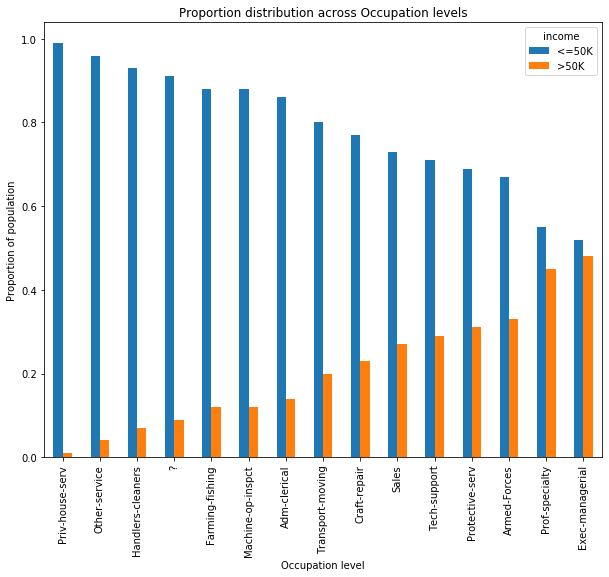

In [39]:
print('Occupation vs Income')
occupation = round(pd.crosstab(df.occupation, df.income).div(pd.crosstab(df.occupation, df.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
abhi = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
abhi.set_xlabel('Occupation level')
abhi.set_ylabel('Proportion of population')



Hours per week vs Income


Text(0, 0.5, 'Proportion of population')

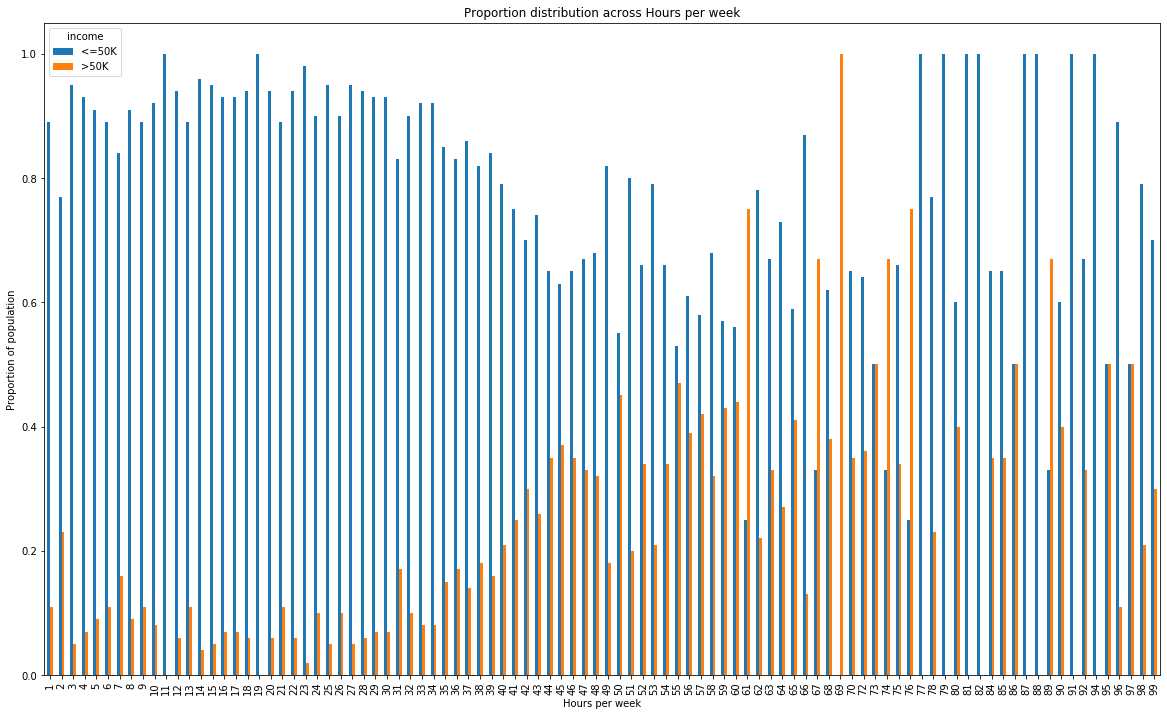

In [40]:
print('Hours per week vs Income')

hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
abhi = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
abhi.set_xlabel('Hours per week')
abhi.set_ylabel('Proportion of population')

# Observation:-
Perform feature transformation: For Numerical Features -> Do Column Normalization i.e. use MinMaxScaler For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.

# Perform feature transformation:-

FOR NUMERICAL FEATURES :-

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Age
scale = MinMaxScaler(feature_range=(-5,5))
scale.fit_transform(df.age.values.reshape(-1, 1))

array([[-3.90410959],
       [-2.12328767],
       [-3.49315068],
       ...,
       [ 0.61643836],
       [-4.31506849],
       [-0.20547945]])

In [42]:
#  Capital-gain
scale = MinMaxScaler(feature_range=(-2,2))
scale.fit_transform(df['capital-gain'].values.reshape(-1, 1))

array([[-2.        ],
       [-2.        ],
       [-2.        ],
       ...,
       [-2.        ],
       [-2.        ],
       [-1.39903399]])

In [43]:
# Capital-loss
scale = MinMaxScaler(feature_range=(-4,4))
scale.fit_transform(df['capital-loss'].values.reshape(-1, 1))

array([[-4.],
       [-4.],
       [-4.],
       ...,
       [-4.],
       [-4.],
       [-4.]])

FOR CATEGORICAL FEATURES :-

In [47]:
# Gender
pd.get_dummies(df['gender'], dummy_na=True)

,Female,Male,NaN
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
48837,1,0,0
48838,0,1,0
48839,1,0,0
48840,0,1,0


In [45]:
pd.get_dummies(df['race'], dummy_na=True)

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,NaN
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
48837,0,0,0,0,1,0
48838,0,0,0,0,1,0
48839,0,0,0,0,1,0
48840,0,0,0,0,1,0


In [48]:
# Native Country
pd.get_dummies(df['native-country'], dummy_na=True)

,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
# Occupation
pd.get_dummies(df['occupation'], dummy_na=True)

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,NaN
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
48839,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48840,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# Marital status
pd.get_dummies(df['marital-status'], dummy_na=True)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,NaN
0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0
48838,0,0,1,0,0,0,0,0
48839,0,0,0,0,0,0,1,0
48840,0,0,0,0,1,0,0,0


In [51]:
# Relationship
pd.get_dummies(df['relationship'], dummy_na=True)

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,NaN
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
48837,0,0,0,0,0,1,0
48838,1,0,0,0,0,0,0
48839,0,0,0,0,1,0,0
48840,0,0,0,1,0,0,0


In [52]:
#Income
pd.get_dummies(df['income'], dummy_na=True)

,<=50K,>50K,NaN
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
48837,1,0,0
48838,0,1,0
48839,1,0,0
48840,1,0,0


In [53]:
# Education
pd.get_dummies(df['education'], dummy_na=True)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,NaN
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
